## Linear Regression (fit, predict, metrics)

In [1]:
# Day 2 — Linear Regression : (fit, predict, metrics)

### Imports & dataset (code)

In [2]:
# Imports for Day 2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Reproducibility
np.random.seed(42)

In [4]:
# Synthetic dataset (200 rows) - known linear relation + noise
n = 200
X = pd.DataFrame({
    "sqft": np.random.normal(1500, 300, n),
    "age": np.random.randint(0, 30, n)
})
y = 100 * X["sqft"] - 500 * X["age"] + np.random.normal(0, 15000, n)

# Quick peek
X.head()

,sqft,age
0,1649.014246,1
1,1458.520710,25
2,1694.306561,16
3,1956.908957,7
4,1429.753988,0


**Explanation**: same as earlier but larger n and more noise to simulate real conditions.

### Split, fit, predict (code)

In [5]:
# 1) Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 2) Create model object
model = LinearRegression()

# 3) Fit the model to training data
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# 4) Make predictions on test set
preds = model.predict(X_test)

# 5) Print learned params
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 104.51614204 -609.81739669]
Intercept: -4376.9467732604535


### Metrics (code)

In [8]:
# Compute errors
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 11799.81
MSE: 228760358.52
RMSE: 15124.83


**Explanation**:

MAE = average |error|

MSE = average squared error

RMSE = sqrt(MSE), same units as target

### Actual vs Predicted plot (code)

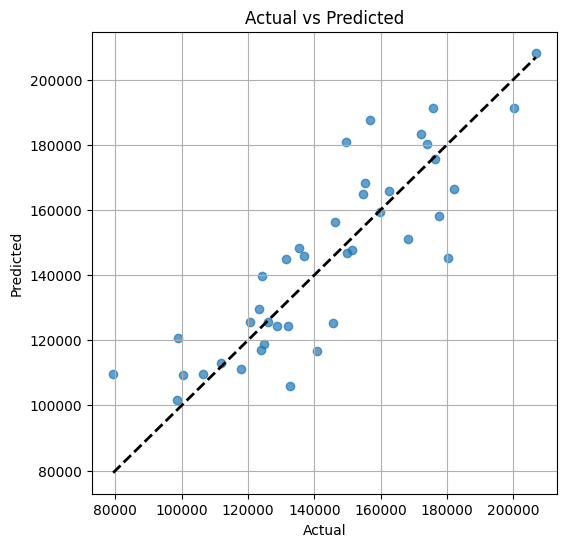

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, preds, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)  # diagonal
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


**Explanation**:

Scatter shows relationship; diagonal dashed line is perfect predictions.
If points cluster near diagonal → good fit.

### Residuals plot (code)

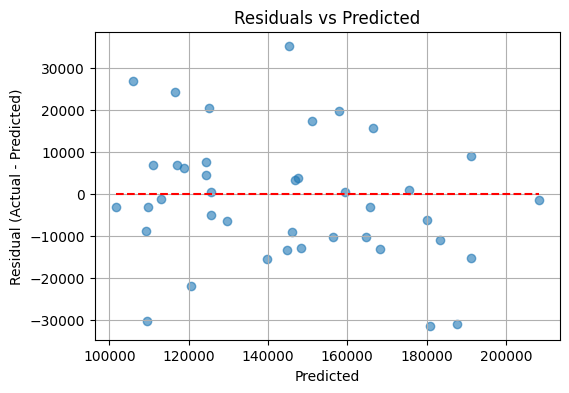

In [10]:
residuals = y_test - preds
plt.figure(figsize=(6,4))
plt.scatter(preds, residuals, alpha=0.6)
plt.hlines(0, preds.min(), preds.max(), colors='r', linestyles='dashed')
plt.xlabel("Predicted")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()


**Explanation**:

Residuals should be randomly scattered around 0. Patterns indicate model problems (non-linearity, heteroscedasticity).